In [1]:
# This document is a working environment and is a part of the Capstone IBM Data Analytics Project, the findings and results
# of which will be submitted in .ppt format.

#The goal of this JN file is to prepare and analyse the dataset(s) available to answer the following questions:
# • What are the top programming languages in demand?
# • What are the top database skills in demand?
# • What are the popular IDEs?

# I tried to make the code consistend, so that you run it cell by cell and it works. If not - sorry:)


In [2]:
#We will start from loading the required packages and will add them as we progress with data analysis.
import pandas as pd

In [3]:
df_raw = pd.read_csv('m5_survey_data_demographics.csv')
# setting the option to display columns at maximum (by default they are shown limited)
pd.set_option('display.max.columns', 80)
df_raw.head(3) # I just want to check if the data has loaded correctly in df. In this case all is ok.

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

In [4]:
#TO BE DELETED
df_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      11398 non-null  int64  
 1   MainBranch      11398 non-null  object 
 2   Hobbyist        11398 non-null  object 
 3   OpenSourcer     11398 non-null  object 
 4   OpenSource      11317 non-null  object 
 5   Employment      11398 non-null  object 
 6   Country         11398 non-null  object 
 7   Student         11347 non-null  object 
 8   EdLevel         11286 non-null  object 
 9   UndergradMajor  10661 non-null  object 
 10  EduOther        11234 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  DevType         11333 non-null  object 
 13  YearsCode       11389 non-null  object 
 14  Age1stCode      11385 non-null  object 
 15  YearsCodePro    11382 non-null  object 
 16  CareerSat       11398 non-null  object 
 17  JobSat          11397 non-null 

In [5]:
df_raw2 = pd.read_csv('m5_survey_data_technologies_normalised.csv') #load the second dataset to pd dataframe
df_raw.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

In [6]:
#DELETE LATER ON
df_raw2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              74589 non-null  float64
 1   LanguageWorkedWith      59792 non-null  object 
 2   LanguageDesireNextYear  55764 non-null  object 
 3   DatabaseWorkedWith      31375 non-null  object 
 4   DatabaseDesireNextYear  29575 non-null  object 
 5   PlatformWorkedWith      39208 non-null  object 
 6   PlatformDesireNextYear  44314 non-null  object 
 7   WebFrameWorkedWith      24803 non-null  object 
 8   WebFrameDesireNextYear  24567 non-null  object 
 9   DevEnviron              33306 non-null  object 
 10  OpSys                   0 non-null      float64
 11  Containers              0 non-null      float64
 12  BlockchainOrg           0 non-null      float64
 13  BlockchainIs            0 non-null      float64
dtypes: float64(5), object(9)
memory usage:

In [7]:
# after quick glance we see that the data is structured differently in df_raw (database 1) and df_raw2(database 2)
# namely in df_raw2 each respondent reply is split into several rows. As we woul like further to join databases, the first step would be to align the formating of the df_raw2 to df_raw1

def join_values(x):
    return ';'.join(x.dropna().astype(str))

df_raw2 = df_raw2.groupby('Respondent').agg(join_values).reset_index()

In [8]:
df_raw2.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,4.0,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,,,Eclipse;Vim;Visual Studio;Visual Studio Code,,,,
1,9.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Vim,,,,
2,13.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Vim;Visual Studio;Visual Studio Code;Xcode,,,,
3,16.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...,C#;HTML/CSS;JavaScript;TypeScript;WebAssembly;...,MongoDB;Microsoft SQL Server;MySQL,Elasticsearch;MongoDB;Microsoft SQL Server;SQLite,,AWS;Google Cloud Platform;Microsoft Azure,Angular/Angular.js;ASP.NET;jQuery,Angular/Angular.js;ASP.NET;React.js,Visual Studio;Visual Studio Code,,,,
4,17.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,MongoDB;PostgreSQL,Elasticsearch;Firebase;MongoDB;PostgreSQL,Arduino;Docker;Heroku;Raspberry Pi;WordPress,Docker,Angular/Angular.js;Express;Spring,Angular/Angular.js;Express;React.js;Spring;Vue.js,IntelliJ;Visual Studio Code,,,,


In [9]:
#now we want to merge two datasets into one. We will do this via 'Respondent'. However I noticed that the data type of the columns are not identical
# being float and int, so we need to align them to int both. To do so:
df_raw2['Respondent'] = df_raw2['Respondent'].astype('Int64') 
#and now lets check again if all is ok
df_raw['Respondent'].dtypes

dtype('int64')

In [10]:
#now I also want to quickly check if there are any duplicates in our datasets
print(df_raw.duplicated().sum())
print(df_raw2.duplicated().sum())

0
0


In [11]:
#now we are ready to merge the datasets into the main DF we will be working with, simply naming it df
df = df_raw.merge(df_raw2, on = 'Respondent', how = 'inner')

In [12]:
#lets check out new dataframe
print(df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11398 entries, 0 to 11397
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [13]:
#lets check null values and also see if we need all those columns in the df for analysis
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    print(df.isnull().sum())


Respondent                   0
MainBranch                   0
Hobbyist                     0
OpenSourcer                  0
OpenSource                  81
Employment                   0
Country                      0
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
CareerSat                    0
JobSat                       1
MgrIdiot                   493
MgrMoney                   497
MgrWant                    493
JobSeek                      0
LastHireDate                 0
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CurrencySymbol               0
CurrencyDesc                 0
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeek

In [14]:
# i quickly analysed and decided that I will exclude some of the least relevan columns from the df to make it lighter. First lets have all columns in easy to copy format
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'BetterLife',
       'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName',
       'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', '

In [15]:
#then I copy and pase the above columns and comment out the ones I dont, need. So I will be able to easily add/replace them once needed and not do any actual df manipulations
df = df[['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 
       #'OpenSource',
       'Employment', 'Country', 
       #'Student', 
       'EdLevel', 
       #'UndergradMajor','EduOther', 
       'OrgSize', 'DevType', 'YearsCode', 
       #'Age1stCode', 'YearsCodePro', 
       'CareerSat', 'JobSat', 
       #'MgrIdiot', 'MgrMoney',
       'MgrWant', 
       #'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 
       #'ResumeUpdate', 
       'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 
       #'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 
       #'ImpSyn', 'CodeRev',
       #'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'BetterLife',
       #'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName',
       #'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       #'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       #'SOComm', 'WelcomeChange', 'SONewContent', 
       'Age', 'Gender', 
       #'Trans', 'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 
       #'DevEnviron', 'OpSys', 'Containers',
       #'BlockchainOrg', 'BlockchainIs'
      ]]


In [16]:
df.head(2) # a quick check that the df is correctly commented out and works

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,OrgSize,DevType,YearsCode,CareerSat,JobSat,MgrWant,JobFactors,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkChallenge,WorkRemote,WorkLoc,Age,Gender,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear
0,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,"Developer, full-stack",3,Very satisfied,Slightly satisfied,Not sure,"Languages, frameworks, and other technologies ...",USD,United States dollar,61000.0,Yearly,61000.0,80.0,NaN,Less than once per month / Never,Home,22.0,Man,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,,
1,9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,New Zealand,Some college/university study without earning ...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,Slightly satisfied,Slightly satisfied,Not sure,Financial performance or funding status of the...,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,23.0,Man,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):


In [17]:
#now when we have the ready to use merged df with relevant columns, lets check that all datatypes are correct
print(df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11398 entries, 0 to 11397
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   Employment              11398 non-null  object 
 5   Country                 11398 non-null  object 
 6   EdLevel                 11286 non-null  object 
 7   OrgSize                 11302 non-null  object 
 8   DevType                 11333 non-null  object 
 9   YearsCode               11389 non-null  object 
 10  CareerSat               11398 non-null  object 
 11  JobSat                  11397 non-null  object 
 12  MgrWant                 10905 non-null  object 
 13  JobFactors              11395 non-null  object 
 14  CurrencySymbol          11398 non-null

In [18]:
# i noticed that YearsCode is object, while it shall be int, so we need to change it.
# after my first attempt with df['YearsCode'] = df['YearsCode'].astype(int) the error code notified that some strings cannot be converted to in (like "Less than I year code")
# so I neede first to see what are the possible groups in this column
temporary = df['YearsCode'].value_counts()
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
       print(temporary)

10                  1006
6                    842
8                    830
5                    783
7                    775
15                   615
12                   573
20                   555
4                    535
9                    502
3                    437
14                   359
11                   354
13                   332
18                   319
2                    270
16                   267
17                   228
25                   221
30                   173
22                   159
19                   156
23                   121
24                   113
21                    94
35                    90
1                     81
26                    65
27                    61
32                    60
28                    56
33                    50
40                    45
37                    43
34                    40
38                    34
29                    29
31                    27
36                    23
39                    22


In [19]:
# from the above I see that there is only 1 "real" string that requires some extra efforts to convert to it to numeric and with only 19 related respondents
# from 11k+ overall it is not worth it, therefore it shall be ither dropped or there is another way - use function

def convert_years(value):
    try:
        return int(value)
    except ValueError:
        return None

df['YearsCode'] = df['YearsCode'].apply(convert_years)

In [20]:
#lets double check all is ok 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
       print(df.dtypes)

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
Employment                 object
Country                    object
EdLevel                    object
OrgSize                    object
DevType                    object
YearsCode                 float64
CareerSat                  object
JobSat                     object
MgrWant                    object
JobFactors                 object
CurrencySymbol             object
CurrencyDesc               object
CompTotal                 float64
CompFreq                   object
ConvertedComp             float64
WorkWeekHrs               float64
WorkChallenge              object
WorkRemote                 object
WorkLoc                    object
Age                       float64
Gender                     object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorked

In [21]:
#now we finally have the ready-to-use dataset(frame), so lets start with actually brief description of it
df.describe()

,Respondent,YearsCode,CompTotal,ConvertedComp,WorkWeekHrs,Age
count,11398.000000,11370.000000,1.058900e+04,1.058200e+04,11276.000000,11111.000000
mean,12490.392437,12.383113,7.570477e+05,1.315967e+05,42.064606,30.779138
std,7235.461999,8.108504,9.705598e+06,2.947865e+05,24.672741,7.393784
min,4.000000,1.000000,0.000000e+00,0.000000e+00,3.000000,16.000000
25%,6264.250000,6.000000,2.500000e+04,2.686800e+04,40.000000,25.000000
50%,12484.000000,10.000000,6.500000e+04,5.774500e+04,40.000000,29.000000
75%,18784.750000,16.000000,1.200000e+05,1.000000e+05,43.000000,35.000000
max,25142.000000,50.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000


In [22]:
# frm the brief overview above we see that:
# - Age seems reasonable with a reasonable deviation
# - WorkWeekHrs also seem to be reasonable at 42 with a deviation of 24 (which can be explained by project worload, schedule etc)
# - Respondent does not really reflect anything here
# - YearsCode also seem reasonable, with mean of 12 years and a deviation of +- 8 years. I believe this survey has good representation of coding experience
# - The questions arise with regards to CompTotal and ConvertedComp, as they have very hgih std. So I would like to look at them closer for outliers

In [23]:
# I will focus on ConvertedComp as the CompTotal does not represent the salaries correctly (as it is in various currencty and with various pay frequency)
# the ConvertedComp is already normalized salary (paid yearly)
#first we calculate the 0.25 and 0.75 quantiles, meaning how much of respondents fall under the set salary
Q1_Salary = df['ConvertedComp'].quantile(0.25)
print(f"25% of respondent's salary is within {Q1_Salary} USD")
Q3_Salary  = df['ConvertedComp'].quantile(0.75)
print(f"75% of respondent's salary is within {Q3_Salary} USD")

# now we will calculate the IQR and determine the reasonable upper bound (all salaries before which are not considered outliers)
IQR = Q3_Salary-Q1_Salary
upper_bound = Q3_Salary + (1.5 * IQR)
lower_bound = 6000 #salaries less than 500 USD/month even for countries like India are most likely to be a mistake in data 
print(f'The upper standard limit of salary is {upper_bound} USD')
print("Everything on top of that is considered to be an oulier or requires very carefull examination")

25% of respondent's salary is within 26868.0 USD
75% of respondent's salary is within 100000.0 USD
The upper standard limit of salary is 209698.0 USD
Everything on top of that is considered to be an oulier or requires very carefull examination


In [24]:
#so the next step would be to exclude the outliers from the dataframe
df = df.loc[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [25]:
#now lets check the new statistics
df.describe().round(1)

,Respondent,YearsCode,CompTotal,ConvertedComp,WorkWeekHrs,Age
count,9185.0,9161.0,9185.0,9185.0,9151.0,8984.0
mean,12515.5,12.6,731553.3,63067.2,42.1,31.0
std,7235.8,8.1,7365575.4,42416.7,24.9,7.4
min,4.0,1.0,130.0,6000.0,3.0,16.0
25%,6236.0,7.0,23000.0,28786.0,40.0,26.0
50%,12602.0,10.0,65000.0,55584.0,40.0,29.0
75%,18803.0,17.0,116000.0,88000.0,42.0,35.0
max,25141.0,50.0,390000000.0,209356.0,1012.0,99.0


In [26]:
df.shape # nowe have around less respondents to work with (still 9000+) but with more accurate information

(9185, 33)

In [27]:
#the above seems more reasonable to proceed with analysis.

In [28]:
#lets see what are the top 10 countries our respondents are from
Top10_Countries = df['Country'].value_counts().sort_values(ascending = False).head(10)
Top10_Countries_df = Top10_Countries.to_frame().rename(columns={'Count': 'Country'})
print(Top10_Countries_df)
 

                Country
United States      2584
United Kingdom      654
Germany             616
India               513
Canada              357
France              304
Brazil              273
Australia           227
Netherlands         219
Spain               208


In [29]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment',
       'Country', 'EdLevel', 'OrgSize', 'DevType', 'YearsCode', 'CareerSat',
       'JobSat', 'MgrWant', 'JobFactors', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'Age', 'Gender',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear'],
      dtype='object')

In [34]:
#now lets see the split of salaries for the a.m. countries
median_salaries = df[df['Country'].isin(Top10_Countries.index)].groupby('Country')['ConvertedComp'].median().sort_values(ascending=False)
print("\nMedian salaries for top 10 countries:\n", median_salaries)

average_salaries = df[df['Country'].isin(Top10_Countries.index)].groupby('Country')['ConvertedComp'].mean().round().sort_values(ascending=False)
print("\nAverage salaries for top 10 countries:\n", average_salaries)


Median salaries for top 10 countries:
 Country
United States     100000.0
Australia          72273.0
Canada             67178.0
Germany            59579.0
United Kingdom     58881.0
Netherlands        53616.0
France             45830.0
Spain              38955.0
Brazil             19020.0
India              15108.0
Name: ConvertedComp, dtype: float64

Average salaries for top 10 countries:
 Country
United States     104684.0
Australia          75767.0
Canada             70791.0
United Kingdom     64200.0
Germany            59514.0
Netherlands        56374.0
France             48082.0
Spain              41740.0
Brazil             24637.0
India              23575.0
Name: ConvertedComp, dtype: float64


In [35]:
#lets also see what are the split in terms of organization scale and dev type
Org_dist = df['OrgSize'].value_counts()
print(f"Distribution of respondents on organization size \n{Org_dist}")
print()
Education = df['EdLevel'].value_counts()
print(f"Distribution of respondents on education \n{Education}")

Distribution of respondents on organization size 
20 to 99 employees                                    2192
100 to 499 employees                                  1870
10,000 or more employees                              1231
1,000 to 4,999 employees                              1047
10 to 19 employees                                     922
2-9 employees                                          724
500 to 999 employees                                   700
5,000 to 9,999 employees                               401
Just me - I am a freelancer, sole proprietor, etc.      13
Name: OrgSize, dtype: int64

Distribution of respondents on education 
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              4593
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           2224
Some college/university study without earning a degree                                1153
Secondary school (e.g. American high school, German Realschule or Gymnasium

In [36]:
#further lets also see what are the most common developer's type on the market. We can use this info in conjuction with other information, as well as standalone to understand what are the current "realities" on the market and what is likely to be expected in future
developer_types = df['DevType'].str.split(';', expand=True).stack().value_counts().head(10)
print("\nMost common developer types:\n", developer_types)


Most common developer types:
 Developer, full-stack                            5610
Developer, back-end                              5037
Developer, front-end                             3145
Developer, desktop or enterprise applications    2069
Developer, mobile                                1531
DevOps specialist                                1363
Database administrator                           1145
System administrator                              990
Designer                                          758
Developer, QA or test                             748
dtype: int64


In [37]:
#Now lets find correlation between languages, databases, platforms, web frameworks, and salaries. For this we will def a function

def avg_salary_by_tech(tech_col, salary_col):
    tech_salary = df[[tech_col, salary_col]].dropna()
    tech_salary[tech_col] = tech_salary[tech_col].str.split(';')
    tech_expanded = tech_salary.explode(tech_col)
    avg_salary = tech_expanded.groupby(tech_col)[salary_col].mean().round(0).sort_values(ascending=False)
    return avg_salary

with pd.option_context ('display.max_rows', 100):
    print("\nAverage salary by programming language:\n", avg_salary_by_tech('LanguageWorkedWith', 'ConvertedComp'))
    print("\nAverage salary by database:\n", avg_salary_by_tech('DatabaseWorkedWith', 'ConvertedComp'))
    print("\nAverage salary by platform:\n", avg_salary_by_tech('PlatformWorkedWith', 'ConvertedComp'))
    print("\nAverage salary by web framework:\n", avg_salary_by_tech('WebFrameWorkedWith', 'ConvertedComp'))



Average salary by programming language:
 LanguageWorkedWith
Clojure                  88421.0
Scala                    81397.0
Go                       79889.0
Ruby                     76376.0
Elixir                   75281.0
WebAssembly              73694.0
F#                       73034.0
Erlang                   71982.0
Rust                     71457.0
Bash/Shell/PowerShell    71243.0
Objective-C              70000.0
Python                   66624.0
Other(s):                66518.0
Swift                    66374.0
                         66179.0
R                        65683.0
TypeScript               65159.0
Kotlin                   63382.0
SQL                      63230.0
JavaScript               63172.0
C#                       62749.0
HTML/CSS                 61849.0
Java                     61238.0
C++                      61034.0
Dart                     60462.0
C                        58564.0
VBA                      57035.0
Assembly                 55431.0
PHP            

In [38]:
#lets find out the most desired frameworks (we have also done this in IBM Cognos)
desired_web_frameworks = df['WebFrameDesireNextYear'].str.split(';', expand=True).stack().value_counts()
print("\nMost desired web frameworks:\n", desired_web_frameworks)


Most desired web frameworks:
 React.js              3748
Vue.js                2524
Angular/Angular.js    2395
ASP.NET               1907
jQuery                1678
Express               1532
                      1351
Spring                1212
Django                1124
Flask                  977
Ruby on Rails          753
Other(s):              639
Laravel                621
Drupal                 119
dtype: int64


In [39]:
# Same for most desired platforms
desired_platforms = df['PlatformDesireNextYear'].str.split(';', expand=True).stack().value_counts()
print("\nMost desired platforms:\n", desired_platforms)


Most desired platforms:
 Docker                   4745
Linux                    4704
AWS                      3554
Windows                  3078
Kubernetes               2614
Android                  2529
Raspberry Pi             2034
MacOS                    2010
Google Cloud Platform    1887
Slack                    1868
Microsoft Azure          1678
iOS                      1552
Arduino                  1128
Heroku                    866
WordPress                 512
                          469
IBM Cloud or Watson       278
Other(s):                 254
dtype: int64


In [40]:
#same for most desired web frameworks
desired_web_frameworks = df['WebFrameDesireNextYear'].str.split(';', expand=True).stack().value_counts()
print("\nMost desired web frameworks:\n", desired_web_frameworks)


Most desired web frameworks:
 React.js              3748
Vue.js                2524
Angular/Angular.js    2395
ASP.NET               1907
jQuery                1678
Express               1532
                      1351
Spring                1212
Django                1124
Flask                  977
Ruby on Rails          753
Other(s):              639
Laravel                621
Drupal                 119
dtype: int64


In [41]:
# and also same for most popular web frameworks currently
web_frameworks = df['WebFrameWorkedWith'].str.split(';', expand=True).stack().value_counts()
print("\nMost popular web frameworks:\n", web_frameworks)


Most popular web frameworks:
 jQuery                3603
Angular/Angular.js    2672
React.js              2666
ASP.NET               2426
Express               1590
Spring                1383
Vue.js                1222
                      1169
Flask                  943
Django                 916
Ruby on Rails          689
Other(s):              686
Laravel                684
Drupal                 238
dtype: int64


In [42]:
#....most desired platforms
desired_platforms = df['PlatformDesireNextYear'].str.split(';', expand=True).stack().value_counts()
print("\nMost desired platforms:\n", desired_platforms)


Most desired platforms:
 Docker                   4745
Linux                    4704
AWS                      3554
Windows                  3078
Kubernetes               2614
Android                  2529
Raspberry Pi             2034
MacOS                    2010
Google Cloud Platform    1887
Slack                    1868
Microsoft Azure          1678
iOS                      1552
Arduino                  1128
Heroku                    866
WordPress                 512
                          469
IBM Cloud or Watson       278
Other(s):                 254
dtype: int64


In [43]:
# and today's most popular platforms
platforms = df['PlatformWorkedWith'].str.split(';', expand=True).stack().value_counts()
print("\nMost popular platforms:\n", platforms)


Most popular platforms:
 Linux                    4625
Windows                  4443
Docker                   3604
AWS                      2876
Slack                    2205
MacOS                    2147
Android                  2080
Microsoft Azure          1357
Raspberry Pi             1333
iOS                      1176
Google Cloud Platform    1168
WordPress                1159
Kubernetes               1013
Heroku                    989
Arduino                   727
                          344
Other(s):                 273
IBM Cloud or Watson       168
dtype: int64


In [44]:
# ...most desired databases
desired_databases = df['DatabaseDesireNextYear'].str.split(';', expand=True).stack().value_counts()
print("\nMost desired databases:\n", desired_databases)


Most desired databases:
 PostgreSQL              3479
MongoDB                 2799
Redis                   2726
MySQL                   2545
Elasticsearch           2328
Microsoft SQL Server    2161
SQLite                  1896
Firebase                1259
MariaDB                 1111
                         877
DynamoDB                 829
Cassandra                796
Oracle                   658
Other(s):                522
Couchbase                294
dtype: int64


In [45]:
# ..most popular databases
databases = df['DatabaseWorkedWith'].str.split(';', expand=True).stack().value_counts()
print("\nMost popular databases:\n", databases)


Most popular databases:
 MySQL                   4263
PostgreSQL              3323
Microsoft SQL Server    3294
SQLite                  2541
MongoDB                 2381
Redis                   2040
Elasticsearch           1611
Oracle                  1410
MariaDB                 1383
Firebase                1029
DynamoDB                 674
Other(s):                612
                         374
Cassandra                312
Couchbase                201
dtype: int64


In [46]:
# it would be interesting to find out what are the top languages per our 10 selected countries (I limited to 3 languages to keep it relatively short)
lang_10_countries = df['Country'].value_counts().head(10).index

desired_languages_by_country = df[df['Country'].isin(lang_10_countries)].groupby('Country')['LanguageDesireNextYear'].apply(
    lambda x: x.str.split(';', expand=True).stack().value_counts().head(3)
)
with pd.option_context('display.max_rows', 300):
    print(f'Moste desired languages to learn by country \n\n {desired_languages_by_country}')


Moste desired languages to learn by country 

 Country                   
Australia       JavaScript     121
                HTML/CSS       117
                TypeScript     107
Brazil          JavaScript     194
                HTML/CSS       156
                Python         130
Canada          JavaScript     200
                Python         163
                HTML/CSS       146
France          JavaScript     171
                HTML/CSS       147
                SQL            137
Germany         JavaScript     320
                HTML/CSS       312
                SQL            261
India           JavaScript     322
                Python         298
                HTML/CSS       210
Netherlands     JavaScript     129
                HTML/CSS       108
                Python         102
Spain           JavaScript     109
                HTML/CSS        95
                Python          86
United Kingdom  JavaScript     369
                HTML/CSS       316
                

In [47]:
#Below are some of my additional data manipulations, partly related to the assignment

In [48]:
df.to_csv('Merged_Developers_Dataset.csv', index=False)

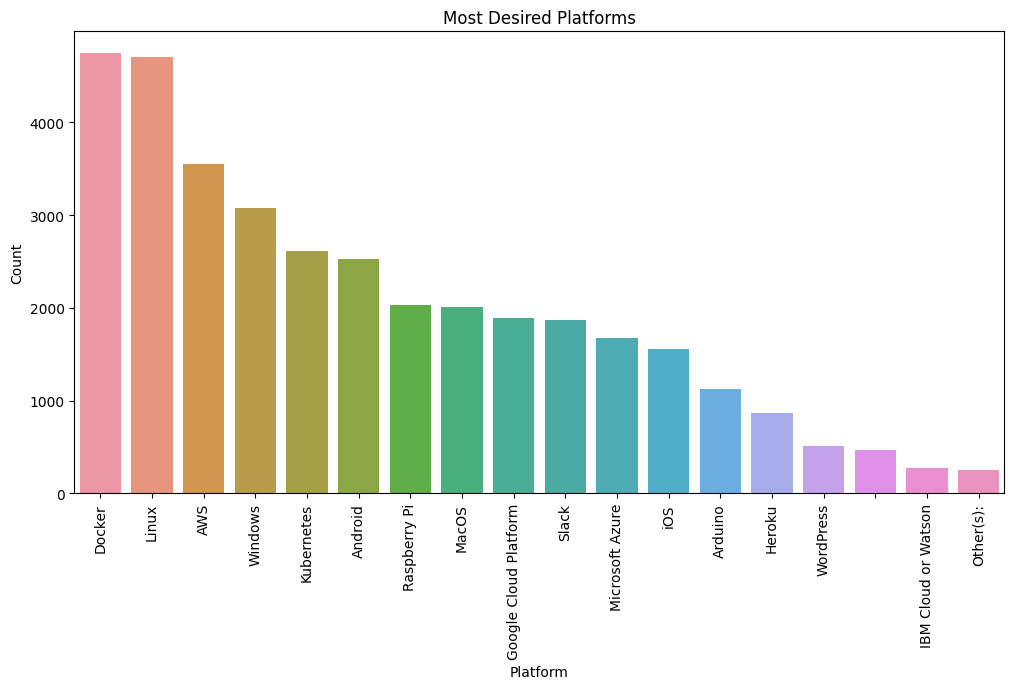

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Reset index and rename columns
desired_platforms_df = desired_platforms.reset_index()
desired_platforms_df.columns = ['Platform', 'Count']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Count', data=desired_platforms_df)
plt.xticks(rotation=90)
plt.title('Most Desired Platforms')
plt.show()

In [53]:
df['Age'].value_counts().head(50).sort_values(ascending = False)

28.0    656
26.0    595
25.0    588
29.0    572
27.0    571
30.0    553
24.0    519
23.0    438
31.0    437
32.0    415
33.0    409
35.0    323
34.0    321
22.0    273
36.0    259
37.0    244
38.0    234
39.0    191
40.0    159
21.0    144
42.0    130
41.0    114
44.0     81
43.0     75
20.0     75
45.0     70
19.0     60
46.0     55
48.0     54
47.0     54
49.0     54
50.0     52
52.0     33
51.0     25
53.0     23
54.0     22
18.0     20
56.0     13
55.0     11
58.0     10
61.0      9
57.0      9
59.0      8
63.0      6
62.0      5
17.0      4
16.0      3
60.0      2
67.0      1
72.0      1
Name: Age, dtype: int64

In [54]:
correlation = df.corr(numeric_only = True)
print(correlation)

               Respondent  YearsCode  CompTotal  ConvertedComp  WorkWeekHrs  \
Respondent       1.000000   0.001415  -0.019899       0.008865    -0.015391   
YearsCode        0.001415   1.000000  -0.007413       0.367030     0.017740   
CompTotal       -0.019899  -0.007413   1.000000      -0.068496     0.004357   
ConvertedComp    0.008865   0.367030  -0.068496       1.000000     0.025544   
WorkWeekHrs     -0.015391   0.017740   0.004357       0.025544     1.000000   
Age              0.001523   0.784620   0.005199       0.376716     0.024750   

                    Age  
Respondent     0.001523  
YearsCode      0.784620  
CompTotal      0.005199  
ConvertedComp  0.376716  
WorkWeekHrs    0.024750  
Age            1.000000  


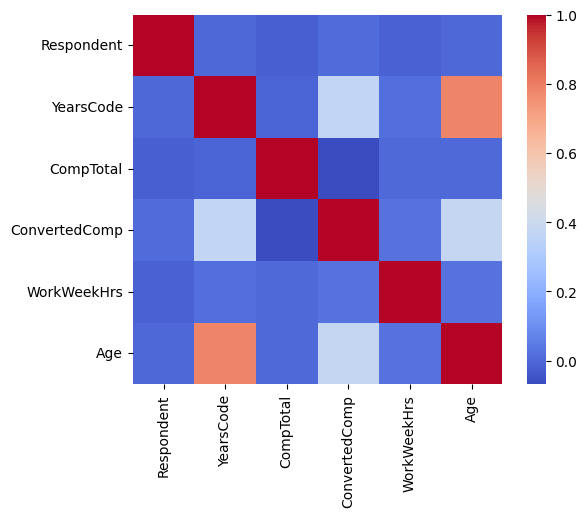

In [57]:
sns.heatmap(data=correlation, cmap="coolwarm", square=True)
plt.show()

In [58]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,OrgSize,DevType,YearsCode,CareerSat,JobSat,MgrWant,JobFactors,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkChallenge,WorkRemote,WorkLoc,Age,Gender,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear
0,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,"Developer, full-stack",3.0,Very satisfied,Slightly satisfied,Not sure,"Languages, frameworks, and other technologies ...",USD,United States dollar,61000.0,Yearly,61000.0,80.0,NaN,Less than once per month / Never,Home,22.0,Man,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,,
1,9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,New Zealand,Some college/university study without earning ...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12.0,Slightly satisfied,Slightly satisfied,Not sure,Financial performance or funding status of the...,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,23.0,Man,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):


In [59]:
df['OpenSourcer'].value_counts()

Never                                                 2947
Less than once per year                               2877
Less than once a month but more than once per year    2378
Once a month or more often                             983
Name: OpenSourcer, dtype: int64

In [90]:
#i'm doing a bit complicated stuff which I'm not 100% confident to do, so to double save I will assign it to new df_test

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

df_test = df.copy()

df_test = df_test.sample(frac=0.5)

input_features = [
    'Country', 'EdLevel', 'OrgSize', 'DevType', 'YearsCode', 'ConvertedComp', 'Age', 'Gender'
]
target_variables = [
    'LanguageDesireNextYear', 'DatabaseDesireNextYear', 'PlatformDesireNextYear'
]

df_test = df_test.dropna(subset=input_features + target_variables)

label_encoders = {}
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        le = LabelEncoder()
        df_test[column] = le.fit_transform(df_test[column].fillna(''))
        label_encoders[column] = le

for target in target_variables:
    X = df_test[input_features]
    y = df_test[target]
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print(f"Top 5 factors influencing {target}:")
    for i in range(5):
        print(f"{i + 1}. {input_features[indices[i]]} ({importances[indices[i]]:.4f})")
    print("\n")
# this task is demanding and complicated for me but gave good understanding of what influences the decision on Languages, databases and platforms.

Top 5 factors influencing LanguageDesireNextYear:
1. ConvertedComp (0.2009)
2. DevType (0.1782)
3. Age (0.1591)
4. YearsCode (0.1500)
5. Country (0.1305)


Top 5 factors influencing DatabaseDesireNextYear:
1. ConvertedComp (0.1960)
2. DevType (0.1798)
3. Age (0.1565)
4. YearsCode (0.1528)
5. Country (0.1225)


Top 5 factors influencing PlatformDesireNextYear:
1. ConvertedComp (0.1999)
2. DevType (0.1818)
3. Age (0.1556)
4. YearsCode (0.1455)
5. Country (0.1277)




In [69]:
# Experimented a bit and got hints from GPT:)
languages_col = 'LanguageWorkedWith'
databases_col = 'DatabaseWorkedWith'
frameworks_col = 'WebFrameWorkedWith'


languages_encoded = df[languages_col].str.get_dummies(sep=';')
databases_encoded = df[databases_col].str.get_dummies(sep=';')
frameworks_encoded = df[frameworks_col].str.get_dummies(sep=';')

tech_encoded = pd.concat([languages_encoded, databases_encoded, frameworks_encoded], axis=1)

corr_matrix = tech_encoded.corr()

for language in languages_encoded.columns:
    print(f"\nTop 5 correlations for {language}:")
    top_5_corr = corr_matrix[language].sort_values(ascending=False).iloc[1:5]  # Excluding the language itself (correlation = 1) using iloc
    print(top_5_corr)
    
    # there is a error, however I dont' know how to solve it, neither I have the will already))



Top 5 correlations for Assembly:
C                        0.309731
C++                      0.221935
Bash/Shell/PowerShell    0.098758
Python                   0.094238
Name: Assembly, dtype: float64

Top 5 correlations for Bash/Shell/PowerShell:
Python           0.227220
C                0.153250
Elasticsearch    0.136189
Go               0.125958
Name: Bash/Shell/PowerShell, dtype: float64

Top 5 correlations for C:
C++                      0.511202
Assembly                 0.309731
Python                   0.196583
Bash/Shell/PowerShell    0.153250
Name: C, dtype: float64

Top 5 correlations for C#:
ASP.NET                 0.718791
Microsoft SQL Server    0.594611
SQL                     0.177914
VBA                     0.144996
Name: C#, dtype: float64

Top 5 correlations for C++:
C           0.511202
Assembly    0.221935
Python      0.188752
SQLite      0.143351
Name: C++, dtype: float64

Top 5 correlations for Clojure:
PostgreSQL    0.086381
DynamoDB      0.062713
Rust          

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [70]:
# had to experiment a bit and work a bit with GPT
co_occurrence = pd.DataFrame(columns=languages_encoded.columns, index=languages_encoded.columns)

for lang1 in languages_encoded.columns:
    lang1_total = languages_encoded[lang1].sum()
    for lang2 in languages_encoded.columns:
        co_occurrence_count = (languages_encoded[lang1] & languages_encoded[lang2]).sum()
        co_occurrence_percentage = (co_occurrence_count / lang1_total) * 100
        co_occurrence.at[lang1, lang2] = co_occurrence_percentage

for language in languages_encoded.columns:
    print(f"\nTop 3 co-occurring languages for {language}:")
    top_3_languages = co_occurrence[language].sort_values(ascending=False).iloc[1:4]  # Excluding the language itself
    print(top_3_languages)



Top 3 co-occurring languages for Assembly:
C         18.537415
Erlang     16.86747
Rust       13.50365
Name: Assembly, dtype: object

Top 3 co-occurring languages for Bash/Shell/PowerShell:
Assembly    67.278287
Rust        64.963504
C            61.64966
Name: Bash/Shell/PowerShell, dtype: object

Top 3 co-occurring languages for C:
Assembly    66.666667
C++         51.682369
Erlang      36.144578
Name: C, dtype: object

Top 3 co-occurring languages for C#:
F#            92.857143
VBA           66.534653
TypeScript    47.085714
Name: C#, dtype: object

Top 3 co-occurring languages for C++:
C              65.306122
Assembly       58.715596
WebAssembly    37.168142
Name: C++, dtype: object

Top 3 co-occurring languages for Clojure:
Rust      5.474453
Erlang    4.819277
Scala     4.679803
Name: Clojure, dtype: object

Top 3 co-occurring languages for Dart:
Kotlin    9.274874
Elixir    7.843137
Swift     7.413793
Name: Dart, dtype: object

Top 3 co-occurring languages for Elixir:
Erlang 

In [71]:
salary_vs_lang = pd.read_csv('popular-languages.csv')

In [84]:
salary_vs_lang.dtypes

Language     object
Salary      float64
dtype: object

In [83]:
# this is required to plot barplot in cell below. I commented out now because already used it
# salary_vs_lang['Salary'] = salary_vs_lang['Salary'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [86]:
salary = salary_vs_lang.head(10).sort_values(by = 'Salary', ascending = False)

In [75]:
salary.to_csv('Salaries_vs_Language.csv', index = False)

In [87]:
salary.head()

,Language,Salary
4,Swift,130801.0
3,Python,114383.0
2,C++,113865.0
1,Javascript,110981.0
0,Java,101013.0


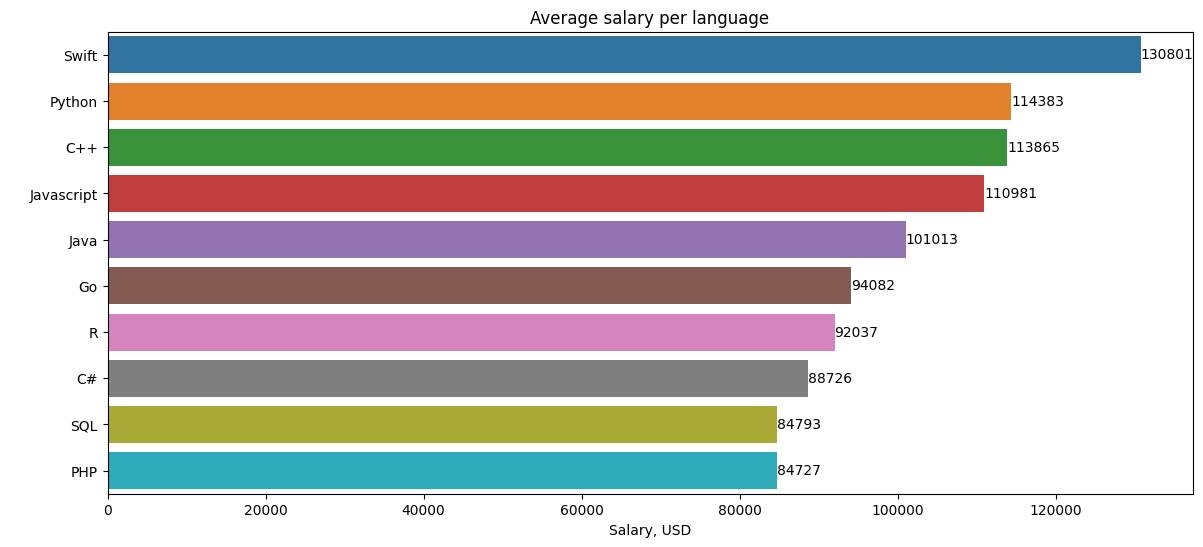

In [88]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x= 'Salary', y = 'Language', data = salary, orient = 'h')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Average salary per language')
plt.xlabel('Salary, USD')
plt.ylabel(' ')
plt.show()

In [89]:
job_post = pd.read_csv('job-postings.csv')
job_post.head()

,Location,Number of jobs
0,Washington DC,5316
1,Detroit,3945
2,Seattle,3375
3,Houston,3339
4,New York,3226
